# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1. Temp maxes out at around 70-90 degrees from 0 to 40 lat. Going higher or lower than that latitude makes the temp drop consistently. 
2. Humidity tends to stay at 60 percent or higher
3. Cloudiness seems to clump up at around either 0 or 100 percent more so than the middle 
4. Wind Speed tends to be under 15 mph all around the world
5. Except for the temp, none of the linear regression charts tend to have much of a trend in either positive or negative directions.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Creating empty list and defining counter
city_list = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_counter = 0
set_counter = 1

# Print initial string
print("Beginning Data Retrieval ")
print("-----------------------------")

# Looping through each city to get data and then appending the data to the empty lists above..
for index, city in enumerate(cities, start = 1):
    try:
        # JSON
        response = requests.get(query_url + city).json()
        
        # Append
        city_list.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if city_counter > 49:
            city_counter = 0
            set_counter = set_counter + 1
    
        else:
            city_counter = city_counter + 1
            
        print(f"Processing Record {city_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | kenai
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | seoul
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | townsville
Processing Record 6 of Set 1 | muhos
Processing Record 7 of Set 1 | nara
City not found. Skipping...
Processing Record 8 of Set 1 | harbour breton
Processing Record 9 of Set 1 | dikson
City not found. Skipping...
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | luwuk
Processing Record 19 of Set 1 | vila
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | h

Processing Record 38 of Set 4 | boa vista
Processing Record 39 of Set 4 | buala
Processing Record 40 of Set 4 | brae
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | bathsheba
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | mahibadhoo
City not found. Skipping...
Processing Record 45 of Set 4 | puerto baquerizo moreno
Processing Record 46 of Set 4 | fryanovo
Processing Record 47 of Set 4 | grand gaube
Processing Record 48 of Set 4 | kuusamo
Processing Record 49 of Set 4 | bubaque
Processing Record 50 of Set 4 | camacha
Processing Record 0 of Set 5 | talnakh
Processing Record 1 of Set 5 | coos bay
Processing Record 2 of Set 5 | visnes
Processing Record 3 of Set 5 | pandan
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | samarai
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | urubicha
Processing Record 8 of Set 5 | margate
Processing Record 9 of Set 5 | fairbanks
City not found. Skipping..

Processing Record 19 of Set 8 | aksu
Processing Record 20 of Set 8 | airai
City not found. Skipping...
Processing Record 21 of Set 8 | shuya
Processing Record 22 of Set 8 | the valley
Processing Record 23 of Set 8 | moindou
Processing Record 24 of Set 8 | tazovskiy
Processing Record 25 of Set 8 | lerwick
Processing Record 26 of Set 8 | leningradskiy
Processing Record 27 of Set 8 | stokmarknes
Processing Record 28 of Set 8 | jizan
Processing Record 29 of Set 8 | big spring
Processing Record 30 of Set 8 | atambua
Processing Record 31 of Set 8 | shitanjing
Processing Record 32 of Set 8 | pengcheng
Processing Record 33 of Set 8 | martin
Processing Record 34 of Set 8 | sukhumi
Processing Record 35 of Set 8 | sungaipenuh
Processing Record 36 of Set 8 | arroyo grande
Processing Record 37 of Set 8 | veraval
Processing Record 38 of Set 8 | conakry
Processing Record 39 of Set 8 | kanker
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | norwich
Processing Record 42 of Set 8 | i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating a Pandas dataframe with the data above
cities_df = pd.DataFrame({"City": city_list, "Lat": latitude, "Lng": longitude, "Max Temp": max_temp,
                          "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
                          "Country": country, "Date": date})
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.5544,-151.2583,55.02,85,100,17.27,US,1660015032
1,Ushuaia,-54.8000,-68.3000,38.86,60,75,10.36,AR,1660015315
2,Seoul,37.5683,126.9778,78.19,100,100,6.91,KR,1660015316
3,Kruisfontein,-34.0033,24.7314,49.89,89,95,7.23,ZA,1660015316
4,Townsville,-19.2500,146.8000,72.48,43,0,14.97,AU,1660015100
...,...,...,...,...,...,...,...,...,...
557,Estelle,29.8458,-90.1067,82.40,81,0,0.00,US,1660015435
558,Sabang,5.8933,95.3214,82.51,72,100,14.47,ID,1660015496
559,Havelock,34.8791,-76.9013,82.94,84,0,9.13,US,1660015497
560,Geraldton,-28.7667,114.6000,57.61,72,75,21.85,AU,1660015497


In [6]:
# Export City data into a .csv file
cities_df.to_csv("cities.csv", index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.652715,21.757601,68.344822,72.453737,54.480427,7.997331,1.660015e+09
std,33.984426,89.445645,13.194778,18.644593,40.110949,5.299764,8.437119e+01
min,-54.800000,-175.200000,28.150000,1.000000,0.000000,0.000000,1.660015e+09
25%,-7.351200,-57.368825,58.832500,61.000000,9.000000,4.012500,1.660015e+09
50%,24.486650,24.133350,69.945000,76.000000,61.500000,6.910000,1.660015e+09
75%,50.537050,101.433325,78.585000,87.000000,99.000000,11.307500,1.660015e+09
max,78.218600,179.316700,99.810000,100.000000,100.000000,25.140000,1.660015e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.
hum_over_hun = cities_df[cities_df.Humidity >= 100].index
hum_over_hun

Int64Index([2, 69, 76, 222, 239, 271, 442], dtype='int64')

In [71]:
# Make a new DataFrame equal to the city data to drop all humidity outliers.

clean_city_data = cities_df.loc[cities_df['Humidity']<100].reset_index()
clean_city_data.drop('index',axis = 1,inplace=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.5544,-151.2583,55.02,85,100,17.27,US,1660015032
1,Ushuaia,-54.8000,-68.3000,38.86,60,75,10.36,AR,1660015315
2,Kruisfontein,-34.0033,24.7314,49.89,89,95,7.23,ZA,1660015316
3,Townsville,-19.2500,146.8000,72.48,43,0,14.97,AU,1660015100
4,Muhos,64.8080,25.9931,46.18,90,28,3.78,FI,1660015316
...,...,...,...,...,...,...,...,...,...
550,Estelle,29.8458,-90.1067,82.40,81,0,0.00,US,1660015435
551,Sabang,5.8933,95.3214,82.51,72,100,14.47,ID,1660015496
552,Havelock,34.8791,-76.9013,82.94,84,0,9.13,US,1660015497
553,Geraldton,-28.7667,114.6000,57.61,72,75,21.85,AU,1660015497


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

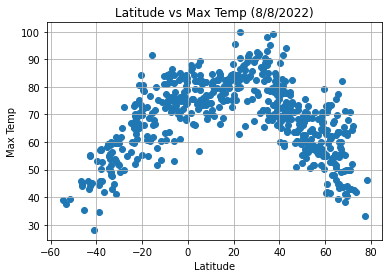

In [73]:
plt.scatter(latitude, max_temp)

plt.title("Latitude vs Max Temp (8/8/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()

plt.savefig("Latitude vs Max Temp")
plt.show()

## Latitude vs. Humidity Plot

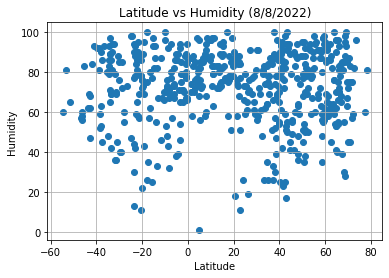

In [74]:
plt.scatter(latitude, humidity)

plt.title("Latitude vs Humidity (8/8/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("Latitude vs Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

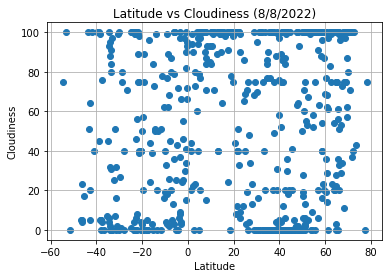

In [78]:
# Latitude vs Cloudiness Plot
plt.scatter(latitude, cloudiness)

plt.title("Latitude vs Cloudiness (8/8/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("Latitude vs Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

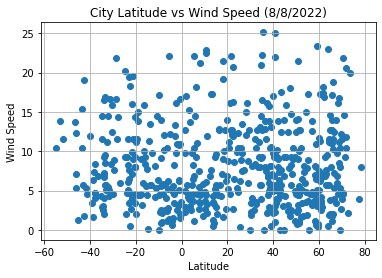

In [77]:
plt.scatter(latitude, wind_speed)

plt.title("City Latitude vs Wind Speed (8/8/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("Latitude vs Wind Speed")
plt.show()

## Linear Regression

In [79]:
# Anything on he top half (above 0) is the north and below is south
n_hemi = clean_city_data.loc[clean_city_data["Lat"] >= 0]
s_hemi = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.686127520499491


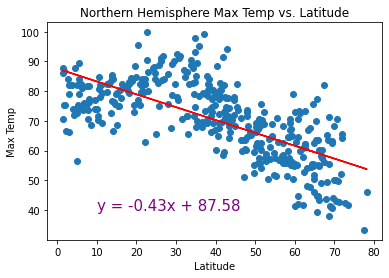

In [111]:
x_val = n_hemi['Lat']
y_val = n_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values, "r-")
plt.annotate(line_eq, (10,40), fontsize = 15, color = "purple")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Max Temp vs. Latitude')

print(f"The r-value is: {rvalue}")

plt.savefig("Northern Hemisphere Max Temp vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8112471023739837


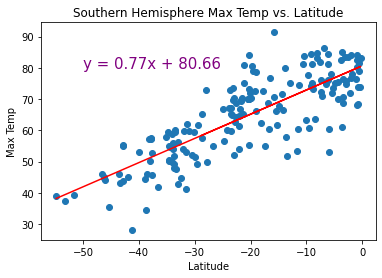

In [136]:
x_val = s_hemi['Lat']
y_val = s_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values, "r-")
plt.annotate(line_eq, (-50,80), fontsize = 15, color = "purple")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere Max Temp vs. Latitude')

print(f"The r-value is: {rvalue}")

plt.savefig("Southern Hemisphere Max Temp vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.09092543019392017


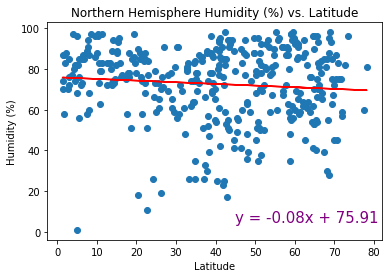

In [138]:
x_val = n_hemi['Lat']
y_val = n_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values, "r-")
plt.annotate(line_eq, (45,5), fontsize = 15, color = "purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity (%) vs. Latitude')

print(f"The r-value is: {rvalue}")

plt.savefig("Northern Hemisphere Humidity (%) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04021411607750723


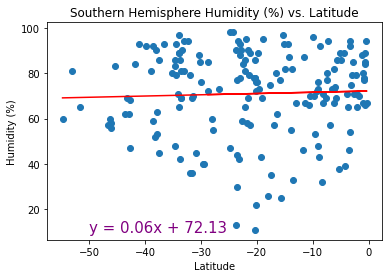

In [140]:
x_val = s_hemi['Lat']
y_val = s_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values, "r-")
plt.annotate(line_eq, (-50,10), fontsize = 15, color = "purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity (%) vs. Latitude')

print(f"The r-value is: {rvalue}")

plt.savefig("Southern Hemisphere Humidity (%) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.06980082872298529


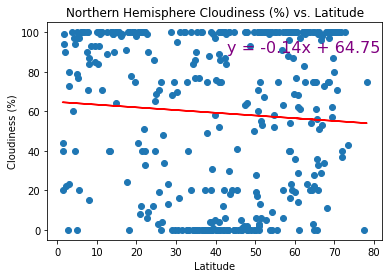

In [133]:
x_val = n_hemi['Lat']
y_val = n_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_values)
plt.plot(x_val,regress_values, "r-")
plt.annotate(line_eq, (43,90), fontsize = 16, color = "purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness (%) vs. Latitude')

print(f"The r-value is: {rvalue}")

plt.savefig("Northern Hemisphere Cloudiness (%) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06899165143741388


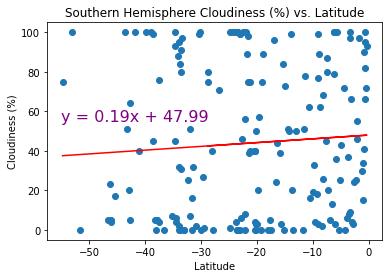

In [132]:
x_val = s_hemi['Lat']
y_val = s_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values, "r-")
plt.annotate(line_eq, (-55,55), fontsize = 16, color = "purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness (%) vs. Latitude')

print(f"The r-value is: {rvalue}")

plt.savefig("Southern Hemisphere Cloudiness (%) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.012291917601096512


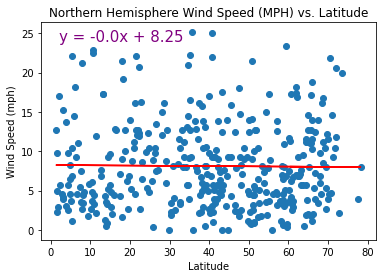

In [131]:
x_val = n_hemi['Lat']
y_val = n_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values, "r-")
plt.annotate(line_eq, (2,24), fontsize = 15, color = "purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed (MPH) vs. Latitude')

print(f"The r-value is: {rvalue}")

plt.savefig("Northern Hemisphere Wind Speed (MPH) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15955002875334853


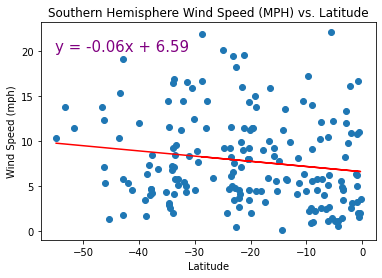

In [128]:
x_val = s_hemi['Lat']
y_val = s_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values, "r-")
plt.annotate(line_eq, (-55,20), fontsize = 15, color = "purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed (MPH) vs. Latitude')

print(f"The r-value is: {rvalue}")

plt.savefig("Southern Hemisphere Wind Speed (MPH) vs. Latitude.png")
plt.show()